from pathlib import Path
from pprint import pp
import requests
import time
import wget
from bs4 import BeautifulSoup
import pandas as pd
from transformers import pipeline, AutoTokenizer
from tqdm.notebook import tnrange
from transformers import DistilBertTokenizerFast, BartTokenizerFast
import numpy as np
classifier = pipeline('sentiment-analysis')
ner = pipeline("ner")
summarize = pipeline("summarization")
classification_tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
summarization_tokenizer = BartTokenizerFast.from_pretrained("sshleifer/distilbart-cnn-12-6")
s = requests.Session()

with Path("secrets.txt").open() as f:
    api_key = f.readline()

In [112]:
base_url = "https://api.regulations.gov/v4/comments"
params = {
    "filter[agencyId]": "CMS",
    "api_key": api_key,
    "page[number]": 1,
    "page[size]": 250,
    "sort": "lastModifiedDate"
}

responses = []
response = s.get(base_url, params=params)
while response.json()["meta"]["hasNextPage"]:
    for i in tnrange(1, int(response.json()["meta"]["totalPages"])):
        response = s.get(base_url, params=params)
        params["page[number]"] = i
        if response.status_code==200:
            responses.append(response.json())
        else:
            print(response.status_code)
            if response.status_code == 429:
                print("Waiting for more requests...")
                time.sleep(3660)
    posted_date = response.json()["data"][-1]["attributes"]["postedDate"]
    params["filter[lastModifiedDate][ge]"] = dateutil.parser.isoparse(posted_date).strftime("%Y-%m-%d %H:%M:%S")
    response = s.get(base_url, params=params)
links = []
last_response = response
for response in responses:
    for data in response["data"]:
        links.append(data["links"]["self"])
        

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

429
Waiting for more requests...


  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

429
Waiting for more requests...


  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

429
Waiting for more requests...


  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

429
Waiting for more requests...


  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

429
Waiting for more requests...


  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

429
Waiting for more requests...


KeyboardInterrupt: 

In [80]:
responses

,Unnamed: 0,0
0,0,"{'data': [{'id': 'CMS-2010-0042-0375', 'type':..."
1,1,"{'data': [{'id': 'CMS-2010-0042-0375', 'type':..."
2,2,"{'data': [{'id': 'CMS-2008-0044-0006', 'type':..."
3,3,"{'data': [{'id': 'CMS-2008-0039-0073', 'type':..."
4,4,"{'data': [{'id': 'CMS-2008-0039-0322', 'type':..."
...,...,...
5661,5661,"{'data': [{'id': 'CMS-2010-0205-0692', 'type':..."
5662,5662,"{'data': [{'id': 'CMS-2010-0205-0942', 'type':..."
5663,5663,"{'data': [{'id': 'CMS-2010-0205-1192', 'type':..."
5664,5664,"{'data': [{'id': 'CMS-2010-0205-1443', 'type':..."


In [82]:
import json

In [89]:
ast.literal_eval(responses["0"][0])

Hospice',
    'objectId': '0900006480621a9d',
    'postedDate': '2008-06-17T04:00:00Z'},
   'links': {'self': 'https://api.regulations.gov/v4/comments/CMS-2008-0041-0056'}},
  {'id': 'CMS-2008-0041-0057',
   'type': 'comments',
   'attributes': {'documentType': 'Public Submission',
    'lastModifiedDate': '2008-06-18T17:20:36Z',
    'highlightedContent': '',
    'withdrawn': False,
    'agencyId': 'CMS',
    'title': 'Columbia Montour Home Hospice',
    'objectId': '0900006480621aa6',
    'postedDate': '2008-06-17T04:00:00Z'},
   'links': {'self': 'https://api.regulations.gov/v4/comments/CMS-2008-0041-0057'}},
  {'id': 'CMS-2008-0041-0058',
   'type': 'comments',
   'attributes': {'documentType': 'Public Submission',
    'lastModifiedDate': '2008-06-18T17:21:49Z',
    'highlightedContent': '',
    'withdrawn': False,
    'agencyId': 'CMS',
    'title': 'Columbia Montour Home Hospice',
    'objectId': '0900006480621ab5',
    'postedDate': '2008-06-17T04:00:00Z'},
   'links': {'self': 'h

In [90]:
responses = pd.read_csv("responses.csv")
links = []
for response in responses["0"]:
    response = ast.literal_eval(response)
    for data in response["data"]:
        links.append(data["links"]["self"])
        

In [91]:
len(links)

1416500

In [4]:
def find_org(comment):
    out = nlp(cleantext)
    if not out:
        return None
    ner_output = pd.DataFrame(out)
    df = ner_output[ner_output["entity"]=='I-ORG']
    reindexed = df.set_index(["index"]).reindex(range(max(ner_output["index"])+1))
    switch = False
    org = ""
    org_list = []
    for word in reindexed["word"]:
        if not pd.isnull(word):
            org+=word
            continue
        else:
            org_list.append(org)
            org = ""
    org_list = filter(None, org_list)
    org_list = [org.replace("#", "") for org in org_list]
    return org_list

In [5]:
records = []

In [16]:
last_response.headers

{'Date': 'Sun, 06 Jun 2021 00:30:39 GMT', 'Content-Type': 'application/vnd.api+json;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'X-RateLimit-Limit': '1000', 'X-RateLimit-Remaining': '960', 'Age': '0', 'Via': 'https/1.1 api-umbrella (ApacheTrafficServer [cMsSf ])', 'X-Cache': 'MISS', 'Access-Control-Allow-Origin': '*', 'Strict-Transport-Security': 'max-age=31536000; preload'}

In [19]:
for i in tnrange(len(links)):
    response = requests.get(links[i], params={"api_key": api_key, "include": "attachments"})
    if response.status_code==200:
        comment = response.json()["data"]["attributes"]["comment"]
        if not comment:
            continue
        cleantext = BeautifulSoup(comment, "lxml").text
        if 20 <= len(tokenizer.encode(cleantext)) <= 512:
            orgs = find_org(cleantext)
            records.append({i: {"organizations": orgs, "sentiment": classifier(cleantext),"summary": summarization(cleantext), "comment": cleantext}})
    else:
        print(response.status_code)
        if response.status_code == 429:
            print("Waiting for more requests...")
            time.sleep(3660)
    # PDF Code
    # file_formats = response["included"][0]["attributes"]["fileFormats"]
    # for files in file_formats:
    #     if files["format"] == "pdf":
    #         wget.download(files["fileUrl"])

  0%|          | 0/4500 [00:00<?, ?it/s]

r decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 34. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 59. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your min_length is set to 56, but you input_length is only 25. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 25. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
429
Waiting for more requests...
Your max_length is set to 142, but you input_length is only 32. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 32. You might consider decreasing max_length manually, e.g. summarizer(

In [67]:
orgs = []
for comments in records:
    res = list(comments.keys())[0]
    if comments[res]["organizations"]:
        orgs.append(comments[res]["organizations"])
flat_list = [item for sublist in orgs for item in sublist]

In [24]:
new_dict = {}
for comments in records:
    res = list(comments.keys())[0]
    orgs = comments[res]["organizations"]
    if not orgs:
        orgs = None
    score = comments[res]["sentiment"][0]["score"]
    label = comments[res]["sentiment"][0]["label"]
    summary = comments[res]["summary"][0]["summary_text"]
    if label=="NEGATIVE":
        score = -score
    new_dict[res] = {"organizations": orgs , "label": label, "score": score, "link":links[res].strip("https://api.regulations.gov/v4/comments/"), "summary": summary}

In [25]:
df = pd.DataFrame(new_dict).T

In [26]:
import numpy as np

In [27]:
df = df.fillna(value=np.nan)
df

,organizations,label,score,link,summary
2,"[NAACOS, MS]",POSITIVE,0.989892,CMS-2017-0120-0052,NAACOS is pleased to submit the attached comm...
5,"[SocietyofInterventionalRadiology, SIR, SIR]",POSITIVE,0.997878,CMS-2015-0075-0303,The Society of Interventional Radiology is a ...
10,"[Hospice, SlowMedicine, Facebook]",NEGATIVE,-0.525210,CMS-2015-0081-1006,"70% of Americans have a chronic illness, yet ..."
12,NaN,POSITIVE,0.999572,CMS-2015-0075-0318,Please see the attached comments on behalf of...
17,NaN,POSITIVE,0.998824,CMS-2015-0075-0346,Thank you for the opportunity to provide the ...
...,...,...,...,...,...
4494,[HHS],POSITIVE,0.807449,CMS-2017-0021-1702,The Affordable Care Act (ACA) is the greatest...
4495,NaN,NEGATIVE,-0.991822,CMS-2017-0021-1971,I do not support this legislations that will ...
4496,"[ACA, ACA, HHS]",NEGATIVE,-0.910056,CMS-2017-0021-1588,The proposed rule would reduce affordability ...
4497,"[ACA, ACA, AC]",POSITIVE,0.949223,CMS-2017-0021-2185,"As the Chair of a small, cash-strapped health..."


<AxesSubplot:xlabel='index', ylabel='score'>

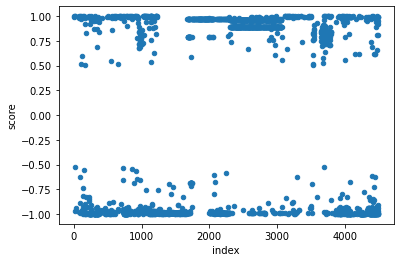

In [28]:
df.reset_index().plot(kind='scatter', x='index', y='score')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2449 entries, 2 to 4498
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   organizations  1041 non-null   object 
 1   label          2449 non-null   object 
 2   score          2449 non-null   float64
 3   link           2449 non-null   object 
 4   summary        2449 non-null   object 
dtypes: float64(1), object(4)
memory usage: 114.8+ KB


In [30]:
abs(df["score"]).describe()

count    2449.000000
mean        0.947065
std         0.077863
min         0.509624
25%         0.935786
50%         0.975468
75%         0.993750
max         0.999808
Name: score, dtype: float64

In [32]:
len(tokenizer.encode(df["summary"].str.cat(sep="\n")))

174779

<AxesSubplot:xlabel='index', ylabel='score'>

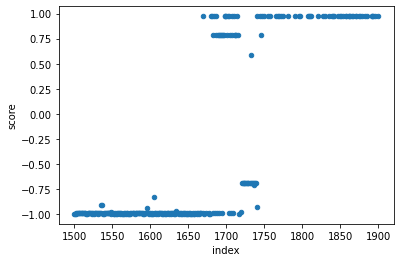

In [53]:
df.loc[1500:1900].plot(kind='scatter', x='index', y='score')

In [71]:
df[900:950]

,organizations,label,score,link,summary
1717,NaN,NEGATIVE,-0.993942,CMS-2014-0115-19909,The Affordable Care Act guaranteed insurance ...
1720,NaN,NEGATIVE,-0.975112,CMS-2014-0115-19992,The Affordable Care Act guaranteed insurance ...
1721,[Administration],NEGATIVE,-0.691276,CMS-2014-0115-20061,I write to strongly object to the administrat...
1722,[Administration],NEGATIVE,-0.691276,CMS-2014-0115-20070,I write to strongly object to the administrat...
1723,[Administration],NEGATIVE,-0.691276,CMS-2014-0115-2008,I write to strongly object to the administrat...
1724,[Administration],NEGATIVE,-0.691276,CMS-2014-0115-20282,I write to strongly object to the administrat...
1725,[Administration],NEGATIVE,-0.691276,CMS-2014-0115-20139,I write to strongly object to the administrat...
1726,[Administration],NEGATIVE,-0.691276,CMS-2014-0115-20288,I write to strongly object to the administrat...
1727,[Administration],NEGATIVE,-0.691276,CMS-2014-0115-20376,I write to strongly object to the administrat...
1728,[Administration],NEGATIVE,-0.691276,CMS-2014-0115-20293,I write to strongly object to the administrat...


## Analysis

In [72]:
df.to_csv("policy_comments.csv")

In [ ]:
texts = []
for text in df["summary"]:
    texts.append(tokenizer.encode(text))
pd.Series(texts).info() 

In [7]:
import numpy as np
import ast

In [30]:
organizations_ = []
for item in pd.read_csv("policy_comments.csv")["organizations"]:
    if type(item) == str:
        item = ast.literal_eval(item)
        for thing in item:
            organizations_.append(thing)
len(organizations_)

3108

In [26]:
import enchant
d = enchant.Dict("en_US")

In [28]:
removed_common_words = []
for string in organizations_:
    if not d.check(string):
        removed_common_words.append(string)

In [66]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", relative_scaling=0 ,max_words=2000, width=1000, height=500, prefer_horizontal=0.85).generate(" ".join(removed_common_words))

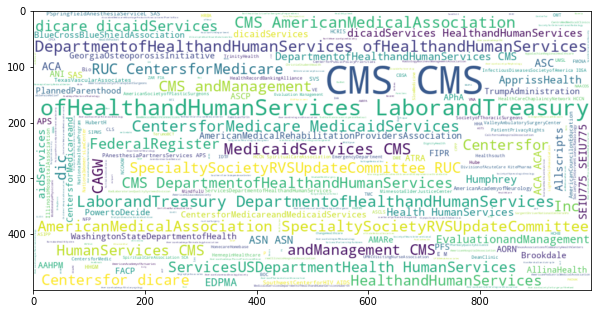

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")


<AxesSubplot:>

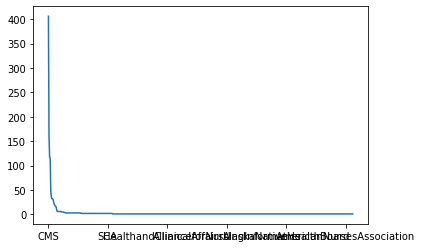

In [68]:
pd.Series(removed_common_words).value_counts().plot()

## Connection to Structured Data

In [3]:
base_url = "https://api.regulations.gov/v4/documents"
params = {
    "filter[agencyId]": "CMS",
    "api_key": api_key,
    "page[number]": 1,
    "page[size]": 10,
    "filter[searchTerm]": "Blood Circulation",
    "sort": "lastModifiedDate"
}

response = s.get(base_url, params=params)
response

<Response [200]>

In [5]:
responses = []
base_url = "https://api.regulations.gov/v4/comments"
params = {
    "filter[agencyId]": "CMS",
    "api_key": api_key,
    "page[number]": 1,
    "page[size]": 250,
    "sort": "lastModifiedDate",
    "filter[commentOnId]": "0900006480a92482"
}
response = s.get(base_url, params=params)
while response.json()["meta"]['hasNextPage']==True:
    responses.append(response.json())
    params["page[number]"] += 1
    response = s.get(base_url,params=params)
links = []
for response in responses:
    for data in response["data"]:
        links.append(data["links"]["self"])

In [6]:
from tqdm.notebook import tqdm

In [7]:
comments = []
for link in tqdm(links):
    comment = s.get(link, params={"api_key": api_key, "include": "attachments"}).json()
    comments.append(comment)

  0%|          | 0/250 [00:00<?, ?it/s]

In [9]:
from bs4 import NavigableString

In [12]:
attachment_details = {}
i = 0
for comment in tqdm(comments):
    # print(comment)
    # comment = comment["data"]["attributes"]["comment"]
    # pp(comment)
    flag = False
    file_formats = comment["included"][0]["attributes"]["fileFormats"]
    key = comment["data"]["id"]
    for files in file_formats:
        # webbrowser.open(files["fileUrl"])
        if files['format']=="htm":
            r = s.get(files["fileUrl"])
            if r.status_code == 200:
                soup = BeautifulSoup(r.text, "lxml")
                for font in soup.find_all('font'):
                    if len(font.contents) > 0:
                        if type(font.contents[0]) != NavigableString:
                            if font.contents[0].contents[0]=="GENERAL":
                                flag = "body"
                                continue
                            if font.contents[0].contents[0]=="Category : ":
                                flag = "category"
                                continue
                    try:
                        if flag=="body" and font.contents:
                            attachment_details[key]["body"] += font.contents[0]
                        if flag=="category" and font.contents:
                            attachment_details[key] = {"category": font.contents[0].contents[0], "body": ""}
                            flag=False
                    except TypeError:
                        print(font)
                        attachment_details[key]["body"] = np.nan
                        attachment_details[key]["category"] = np.nan
                        continue
            else:
                print(r.status_code)


  0%|          | 0/250 [00:00<?, ?it/s]

<font face="times"><b>HCPCS codes</b></font>
</font>
<font face="times"> </font>
</font>
</font>
</font>
</font>
</font>
</font>
</font>
</font>
<font face="times"> </font>
</font>
<font face="times"> </font>
</font>
<font face="times"> </font>
</font>
<font face="times"> </font>
</font>
<font face="times"> </font>
</font>
<font face="times"> </font>
</font>
<font face="times"> </font>
</font>
<font face="times"> </font>
</font>
<font face="times"> </font>
</font>
<font face="times"> </font>
</font>
</font>
<font face="times"><b>Medicare GME Affilations</b></font>
</font>
<font face="times"> </font>
</font>
</font>
</font>
</font>
</font>
</font>
</font>
</font>
<font face="times"> </font>
</font>
<font face="times"> </font>
</font>
<font face="times"> </font>
</font>
<font face="times"> </font>
</font>
<font face="times"> </font>
</font>
<font face="times"> </font>
</font>
<font face="times"> </font>
</font>
<font face="times"> </font>
</font>
<font face="times"> </font>
</font>
<font

In [13]:
comments[246]["included"][0]["attributes"]["fileFormats"]

[{'fileUrl': 'https://downloads.regulations.gov/CMS-2010-0020-0248/attachment_1.htm',
  'format': 'htm',
  'size': 3610}]

In [14]:
df = pd.DataFrame(attachment_details).T.reset_index()
df

,index,category,body
0,CMS-2010-0020-0002,Ambulatory Surgical Center,I am writing to encourage you to halt any cuts...
1,CMS-2010-0020-0003,Individual,I am a patient who relies on interventional pa...
2,CMS-2010-0020-0004,Individual,I am a patient who relies on interventional pa...
3,CMS-2010-0020-0005,Individual,I am a patient who relies on interventional pa...
4,CMS-2010-0020-0006,Individual,I am a patient who relies on interventional pa...
...,...,...,...
245,CMS-2010-0020-0247,Health Care Provider/Association,
246,CMS-2010-0020-0248,Health Care Provider/Association,
247,CMS-2010-0020-0249,Health Care Provider/Association,
248,CMS-2010-0020-0250,Health Care Provider/Association,


In [231]:
import itertools

In [308]:
tokens = []
for comment in tqdm(df["body"]):
    try:
        model_input = summarization_tokenizer.encode(comment)
        tokens.append(model_input)
    except TypeError:
        print(comment)
tokens=itertools.chain.from_iterable(tokens)

  0%|          | 0/250 [00:00<?, ?it/s]

nan
nan
nan


In [309]:
token_series = pd.Series(tokens).value_counts().reset_index()

In [311]:
token_series["decoded tokens"] = token_series["index"].apply(summarization_tokenizer.decode)

In [312]:
token_series["decoded to"]

,index,0,decoded tokens
0,4,4146,.
1,7,3881,to
2,5,3642,the
3,6,3577,","
4,1437,3019,
...,...,...,...
1178,616,1,While
1179,808,1,id
1180,6791,1,77
1181,2134,1,abuse


In [163]:
pp(comments[0])

{'data': {'id': 'CMS-2010-0020-0002',
          'type': 'comments',
          'links': {'self': 'https://api.regulations.gov/v4/comments/CMS-2010-0020-0002'},
          'attributes': {'commentOn': '0900006480a92482',
                         'commentOnDocumentId': 'CMS-2010-0020-0001',
                         'duplicateComments': 0,
                         'address1': None,
                         'address2': None,
                         'agencyId': 'CMS',
                         'city': None,
                         'category': 'Ambulatory Surgical Center - '
                                     'HPA05\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0',
                         'comment': None,
                         'country': None,
                         'di

In [111]:
response = s.get(response.json()["data"][0]["links"]["self"], params={"api_key": api_key, "include": "attachments"}).json()

In [115]:
file_formats = response["included"][0]["attributes"]["fileFormats"]
for files in file_formats:
    print(files["fileUrl"])
    # if files["format"] == "pdf":
    #     wget.download(files["fileUrl"])

https://downloads.regulations.gov/CMS-2010-0020-0002/attachment_1.htm
